# Classes Report

The aim of this notebook is using pattern mining in order to exploit frequent terms and associations to user whenever a twitter were classified as cyberbullying.

## Library & Dataset Import

In [ ]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../dataset/training_set.csv")

df = df[df['multiclass_label'] != 'not_cyberbullying'].copy()


## Dataset Vectorization

In [ ]:

with open("../model/bow_vocabulary.pkl", "rb") as f:
    saved_vocab = pickle.load(f)

vectorizer = CountVectorizer(vocabulary=saved_vocab, binary=True)
X_bow = vectorizer.transform(df['text'])

bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())
bow_df["multiclass_label"] = df["multiclass_label"].values


## Freqeunt terms & associations mining

/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/2868137280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")


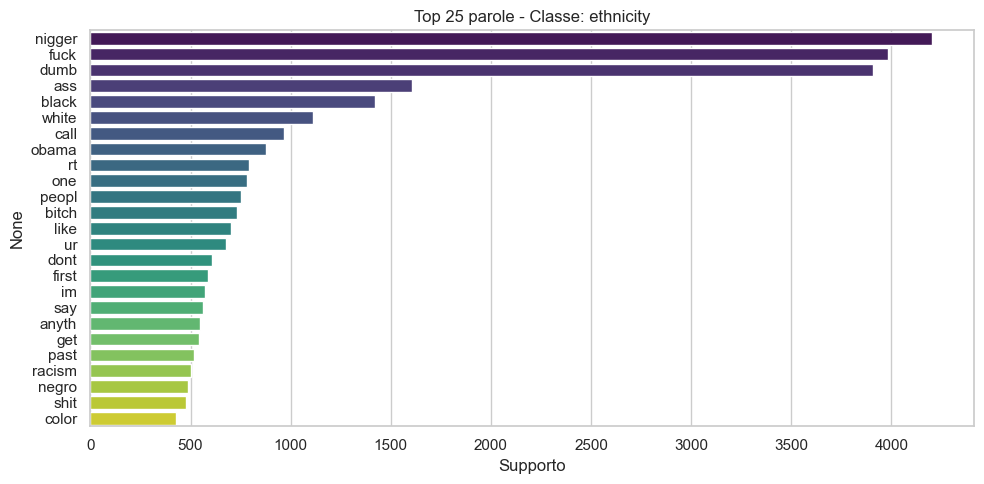

/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/2868137280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")


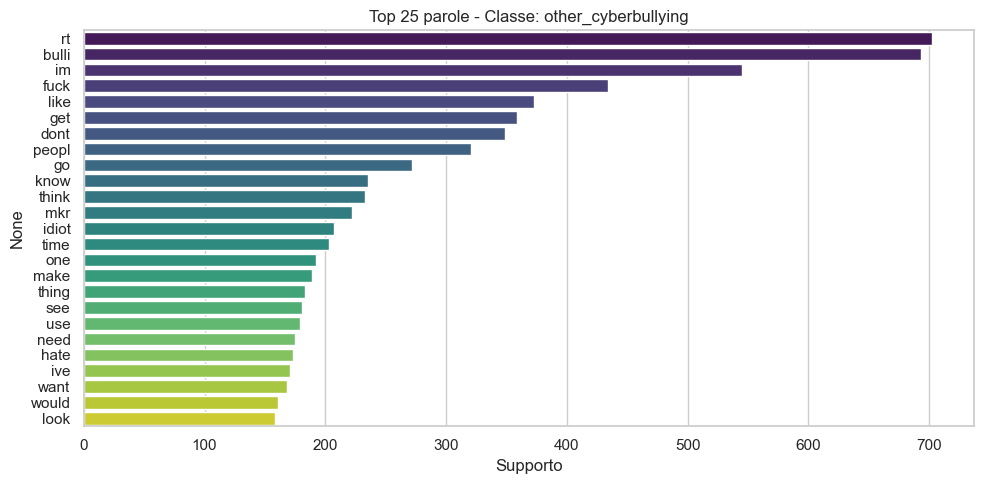

/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/2868137280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")


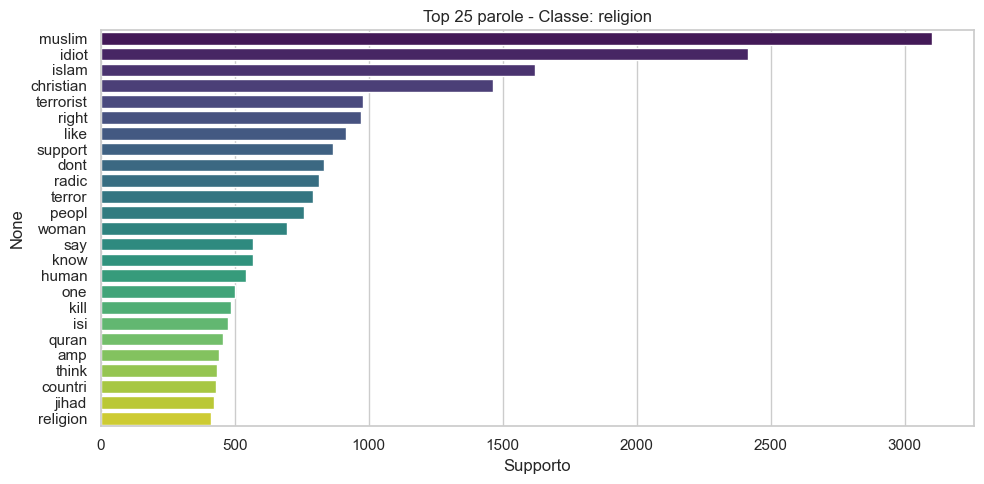

/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/2868137280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")


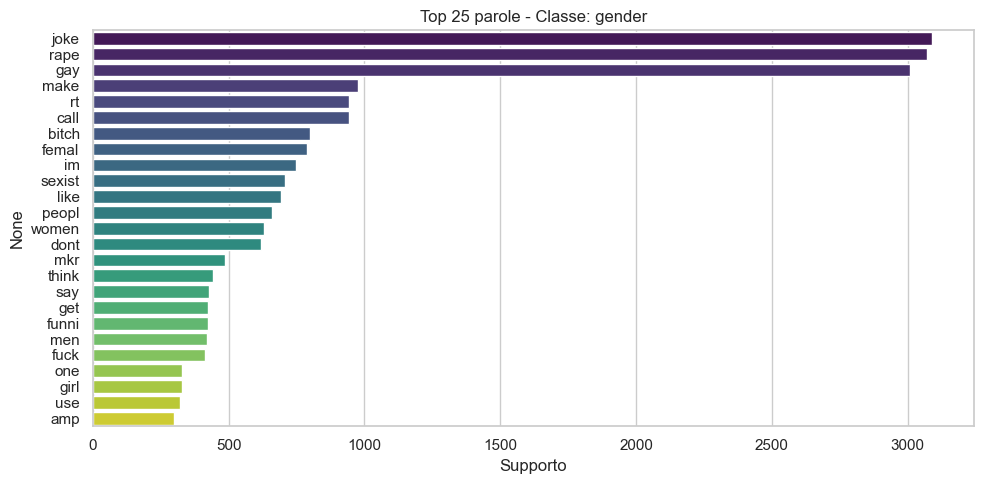

/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/2868137280.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")


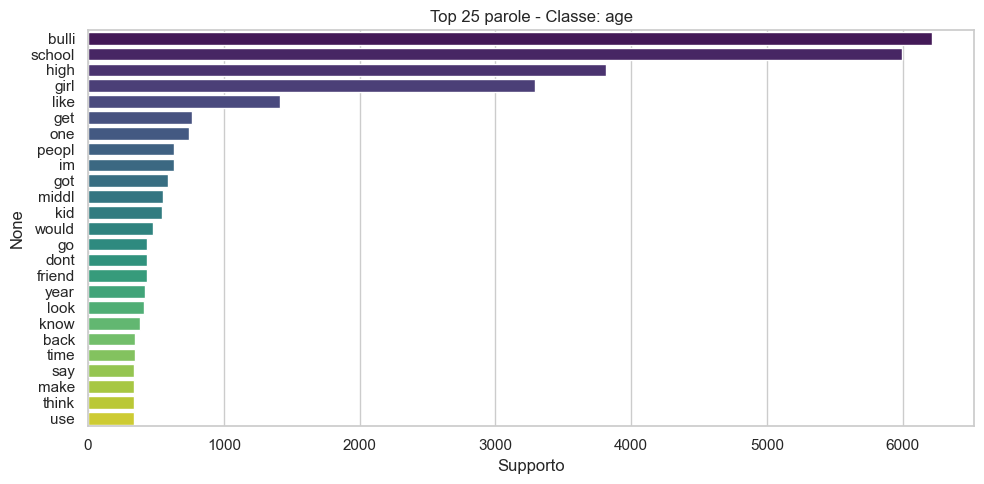

/opt/anaconda3/envs/DMML/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:

classi = bow_df['multiclass_label'].unique()
rules_by_class = {}


sns.set(style="whitegrid")

for classe in classi:
    class_df = bow_df[bow_df['multiclass_label'] == classe].drop(columns=['multiclass_label'])

    word_support = class_df.sum().sort_values(ascending=False).head(25)

    plt.figure(figsize=(10, 5))
    sns.barplot(x=word_support.values, y=word_support.index, palette="viridis")
    plt.title(f"Top 25 parole - Classe: {classe}")
    plt.xlabel("Supporto")
    plt.tight_layout()
    plt.show()

    frequent_itemsets = apriori(class_df, min_support=0.1, use_colnames=True)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
    rules = rules.sort_values(by="lift", ascending=False)

    rules_by_class[classe] = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


In [18]:
# Unisce tutte le tabelle in un unico DataFrame
all_rules = pd.concat(rules_by_class, names=["Classe"])
all_rules.reset_index(inplace=True)

# Mostra le prime regole
all_rules.head(10)

# (Opzionale) Salva le regole
all_rules.to_csv("regole_associazione_per_classe.csv", index=False)


/var/folders/k5/2x805v8s36zft24jm8_zy2980000gn/T/ipykernel_3917/1701675366.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_rules = pd.concat(rules_by_class, names=["Classe"])
